<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; text-align: left; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Jan Attig</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; font-size: 30px; padding:0px;">Statistische Physik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; font-size: 30px; padding:0px;">Übungsblatt 12</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px;">Wintersemester 2020/21</h3>
<hr>

**Website** [http://www.thp.uni-koeln.de/trebst/Lectures/2020-StatPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2020-StatPhys.shtml)

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

# Der Ising Ferromagnet

Nachdem wir in der letzten Woche mit dem Ising Paramagneten ein erstes klassisches Spin-Modell aus nicht-wechselwirkenden Ising-Spins in einem Magnetfeld diskutiert haben, möchten wir nun den Effekt von paarweisen **Wechselwirkungen** zwischen den Ising Spins untersuchen. Der Modell-Hamiltonian wird dazu wie folgt erweitert:

\begin{equation}
    \mathcal{H} = -J \sum_{\langle \alpha,\beta \rangle} \sigma_\alpha \sigma_\beta + \sum_{\alpha} -h \sigma_\alpha \,.
\end{equation}

Hierbei wird im zweiten Term wieder über alle Plätze eines Gitters summiert  (wie etwa einem Quadratgitter in der unten stehende Abbildung). Der Index $\alpha$ bezeichnet dabei die verschiedenen Spins und kann z.B. ausgedrückt werden durch einen Tupel an Indices für die Gitterkoordinaten: $\alpha = (i,j)$.
Die Summe über $\langle \alpha \beta \rangle$ im ersten Termn läuft über *benachbarte* Spins $\sigma_\alpha$ und $\sigma_\beta$ im Quadratgitter (siehe Abbildung).

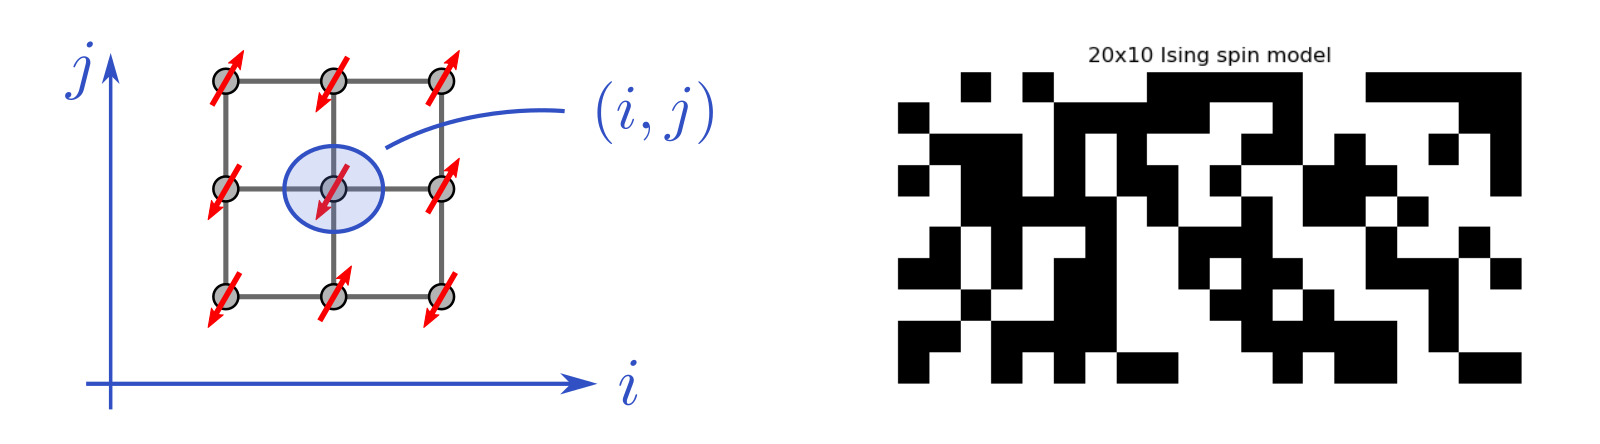

Wir möchten im folgenden erneut eine numerische Simulation dieses Modell-Systems aufsetzen und anhand eines Monte Carlo-Verfahrens Observablen des Systems, insbesondere die Magnetisierung und spezifische Wärme, berechnen.

# Metropolis Monte Carlo

Für die numerische Messung der Observablen haben wir Ihnen erneut den Metropolis Monte Carlo Code des Ising Paramagneten, d.h. des Systems ohne Wechselwirkungen, zur Verfügung gestellt.

Zur Erinnerung: Der Algorithmus läuft nach folgendem grundsätzlichen Schema ab:

1. Zuerst werden Funktionen implementiert, die Ising Spins einzeln oder als Vielteilchen-Konfiguration erzeugen und diese plotten. Damit wird im Programm die Möglichkeit geschaffen, Konfigurationen von Spins zu erzeugen und zu untersuchen.
2. Für die bestehenden Konfigurationen wird eine Energie nach oben stehendem Hamiltonian definiert. 
3. Mit Hilfe der Energie lässt sich ein einzelner Metropolis-Update als Funktion definieren. Speziell werden hier die Übergangswahrscheinlichkeiten so implementiert, dass Konfigurationen gemäss der Boltzmann-Gewichte erzeugt werden wenn wir eine längere Markov-Kette erzeugen (siehe Computer-Physik).
4. Als letzter Schritt folgt die Messung thermodynamischer Observablen entlang dieser Markov-Kette (also nach jedem Metropolis-Update).

Führen Sie für zuerst die Implementation der Funktionen nachfolgende Zellen aus.


In [ ]:
function get_Ising_spin()
    # Pruefe ob Zufallszahl zwischen 0 und 1 groesser als 0.5
    if rand() > 0.5
        return +1
    else
        return -1
    end
end

In [ ]:
function get_Ising_spins(Lx, Ly)
    # neues Array fuer die Ising Spins
    spins = zeros(Int64, Lx, Ly)
    # Alle Spins im Array auf zufaeelige Spins setzen
    for i in 1:Lx
    for j in 1:Ly
        spins[i,j] = get_Ising_spin()
    end
    end
    # Spins zurueckgeben
    return spins
end

In [ ]:
# Importieren von PyPlot
using PyPlot
pygui(false)

function plot_Ising_spins(spins)
    # neue Figur anlegen
    figure()    
    # Die Spins plotten mittels imshow (in Schwarz-Weiss)
    imshow(spins', cmap="gray", origin="lower", interpolation="None", vmin=-1, vmax=1)
    # keine Axenbeschriftung
    axis("off")
end

In [ ]:
function get_energy_of_spin(spin_array, J,h, i,j)
    # HIER MUSS ERGAENZT WERDEN
    return -h*spin_array[i,j]
end

In [ ]:
function get_energy(spin_array, J,h)
    energy = 0.0
    for i in 1:size(spin_array)[1]
    for j in 1:size(spin_array)[2]
        energy += get_energy_of_spin(spin_array, J,h, i,j)
    end
    end
    return energy
end

In [ ]:
function update_SSF!(spin_array, J,h, T)
    # Update vorschlagen
    i = rand(1:size(spin_array)[1])
    j = rand(1:size(spin_array)[2])
    # dE ausrechnen
    # HIER MUSS ERGAENZT WERDEN
    dE = 2*h*spin_array[i,j]
    # Akzeptieren Ja / Nein
    if rand() < exp(-dE / T)
        # JA
        spin_array[i,j] *= -1
    else
        # NEIN
    end
end

In [ ]:
function sweep_SSF!(spin_array, J,h, T)
    # Anzahl spins an Update vorschlagen
    for u in 1:size(spin_array)[1]*size(spin_array)[2]
        update_SSF!(spin_array, J,h, T)
    end
end

In [ ]:
# Magnetisierung definieren
function get_magnetization(spin_array)
    return sum(spin_array)
end

# a) Wechselwirkungen und Energie eines Spins

Durch das Hinzufügen von Wechselwirkungen verändern wir die Energie, die ein einzelner Spin besitzt. Machen Sie sich klar, welche Energie jetzt einem einzelnen Spin zugeordnet wird und implementieren Sie diese Änderung in die Funktionen `get_energy_of_spin` und `update_SSF!` an den gekennzeichneten Stellen.

# b) Magnetisierungskurven

Plotten Sie, wie in der vergangenen Woche, Magnetisierungskurven als Funktion des äußeren Magnetfelds für verschiedene Temperaturen. Vergleichen Sie dabei insbesondere das Verhalten des Paramagneten ($J=0$) mit dem eines wechselwirkenden Systems ($J=1$) für verschiedene Temperaturen ($T=0.1, 1, 2, 5$).



# c) Spezifische Wärmekapazität

Um das unterschiedliche Verhalten bei verschwindendem Magnetfeld und kleinen Temperaturen weiter zu verstehen, betrachten wir im folgenden die thermodynamischen Signaturen verschiedener Größen für den Fall *ohne* äußeres Magnetfeld. 

Als erstes betrachten wir dazu die spezifische Wärmekapazität, die definiert ist als

\begin{equation}
    C_V = \frac{1}{N}\left.\frac{\partial \langle E \rangle}{\partial T}\right|_V
\end{equation}

Sie kann deswegen entweder als Ableitung der bereits berechneten Kurve $E$ vs. $T$ ermittelt werden, oder &mdash; noch eleganter &mdash; über die Mittelwerte von $E$ und $E^2$ durch

\begin{equation}
    C_V = \frac{1}{T^2 N} \left(\langle E^2 \rangle - \langle E \rangle^2 \right)
\end{equation}

Leiten Sie diesen Ausdruck her und berechnen Sie die Wärmekapazität mit Hilfe Ihrer Monte Carlo Simulation in Abhängigkeit der Temperatur für den Fall $J=1$ und $h=0$.

*Hinweis (1): Um einen bestimmten Bereich der Kurve besser auflösen zu können, können Sie die Temperaturpunkte aus der nachfolgenden Zelle benutzen.*

*Hinweis (2): Damit Sie glatte Kurven berechnen, sollten Sie eine angemessene Anzahl an Thermalisierungs- und Mess-Sweeps durchführen, z.B. 10000 Sweeps für die Thermalisierung und 100000 für die Messung.*

In [ ]:
T_vals = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.05, 2.1, 2.15, 2.2, 2.25, 2.3, 2.35, 2.4, 2.45, 2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0];

# d) Ordnungsparameter: Magnetisierung

Plotten Sie jetzt den Ordnungsparameter des Systems, die Magnetisierung pro Spin, als Funktion der Temperatur bei äußerem Feld $h=0$ und beschreiben Sie das qualtiative Verhalten.

Untersuchen Sie danach das Verhalten für ein kleines externes Magnetfeld $h=0.1$. Was hat sich verändert und warum?

# e) Magnetische Susceptibilität

Analog zur Berechnung der spezifischen Wärmekapazität aus Variationen der Energie lässt sich auch die magnetische Susceptibilität

\begin{equation}
    \chi = \frac{1}{N}\left.\frac{\partial \langle M \rangle}{\partial h}\right|_T
\end{equation}

aus Variationen der Magnetisierung berechnen:

\begin{equation}
    \chi = \frac{1}{NT} \left(\langle M^2 \rangle - \langle M \rangle^2 \right)
\end{equation}

Leiten Sie auch diesen Ausdruck her und berechnen Sie die Susceptibilität mit Hilfe Ihrer Monte Carlo Simulation in Abhängigkeit der Temperatur für den Fall $J=1$ und $h=0$.